<a href="https://colab.research.google.com/github/PosgradoMNA/Atividades-de-aprendizaje-SamaraGarcia/blob/main/Assigment07_Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assigment 07 Regresiones y K means

---


##Ciencia y analítica de datos
##Fecha de entrega: 9 de Noviembre del 2022
##Alumna: Samara García González
##No.Cuenta: A01273001

In [149]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge,Lasso
np.random.seed(42)

# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [150]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
521,4.518689,38.634483
737,5.284690,33.233497
740,5.292696,34.550609
660,5.030596,34.982985
411,4.182289,43.090662
678,5.077623,29.087582
626,4.925292,39.152161
513,4.483809,41.780157
859,5.853092,36.344797
136,3.049856,54.462176


In [151]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [152]:
len(X)

1000

In [153]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

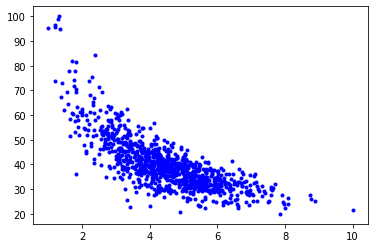

In [154]:
plt.plot(X,y,'b.')

**Ejercicio 1**


---



In [155]:
#1.-Divide los datos del costo de manufactura. Utiliza la función train_test_split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros: {len(X)}')
print("\n")
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("\n")
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros: 1000


Numero total de registros en el training set: 900
Tamaño de X_train: (900, 1)


Mumero total de registros en el test dataset: 100
Tamaño del X_test: (100, 1)


w = [-5.98882699], b = 66.83650741226988
*Coeficiente obtenidos:  [-5.98882699]
*Termino independiente::  66.83650741226988
*MSE: 46.85
*RMSE: 6.84
*R2: 0.57


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


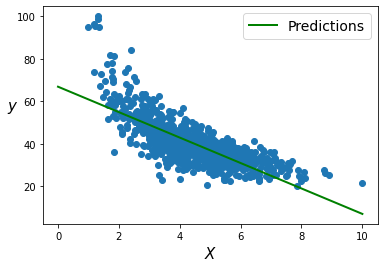

In [156]:
#2.-Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada. 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression(fit_intercept=True)
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

#Modelo generado
print('w = ' + str(regr.coef_) + ', b = ' + str(regr.intercept_))
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('*Coeficiente obtenidos: ', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('*Termino independiente:: ', regr.intercept_)
# Error Cuadrado Medio
print("*MSE: %.2f" % mean_squared_error(y_train, y_pred))
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("*RMSE: %.2f" %rmse)
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('*R2: %.2f' % r2_score(y_train, y_pred))
#Gráfica 
X_fit = np.linspace(0, 10, 100)
y_fit = regr.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "g-",linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=15)
plt.ylabel("$y$", rotation=0, fontsize=15)
plt.legend(loc="best", fontsize=14);




The model estimates:

$\hat{y} = -5.988X + 66.83$

In [157]:
#3.-Realiza la  regresión polinomial completa, tu modelo generado , su visualización, sus errores y r cuadrada.
from sklearn.preprocessing import PolynomialFeatures
#Using polinomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

print("Input", poly_features.n_input_features_)
print("Output", poly_features.n_output_features_)
print("Powern", poly_features.n_input_features_)

X_poly.shape

Input 1
Output 2
Powern 1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


(900, 2)

In [158]:
regresion_lineal_poli = LinearRegression(fit_intercept=True)
regresion_lineal_poli.fit(X_poly,y_train)
regresion_lineal_poli.coef_,regresion_lineal_poli.intercept_

(array([-16.40638102,   1.13136095]), 88.80179909112496)

The model estimates:

$\hat{y} =  -16.4X +1.131X^2 + 88.8$

In [159]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)
lin_reg.coef_, lin_reg.intercept_

(array([-16.40638102,   1.13136095]), 88.80179909112496)

In [160]:
X_new=np.linspace(0, 9, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


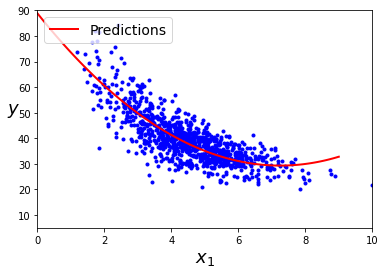

In [161]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 5, 90]);

LR:
W: 67.03904193389238
b: [-6.0333683]
*MSE: 47.22
*RMSE: 6.87
*R2: 0.58


RIDGE:
W: 66.81400260784127
b: [-5.98305544]
*MSE: 47.22
*RMSE: 6.87
*R2: 0.58


LASSO:
W: 40.05299943155
b: [-0.]
*MSE: 112.15
*RMSE: 10.59
*R2: 0.00




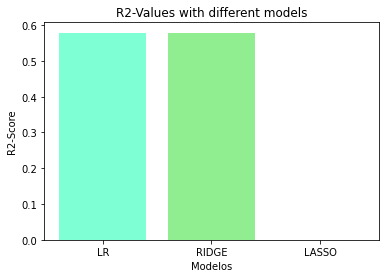

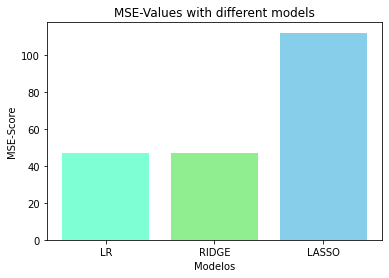

In [207]:
#4.-Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
modelos = []
modelos.append(('LR', LinearRegression()))  
modelos.append(('RIDGE', Ridge(alpha=15))) 
modelos.append(('LASSO', Lasso(alpha=15)))  


yhat0 = []   # predicciones del modelo RLM
yhat1 = []   # predicciones del RLM con regularización L1
yhat2 = []   # predicciones del RLM con regularización L2
yhat12 = []  # predicciones del RLM con regularización L1 y L2
names = []
r2s= []
mses= []


for name, model in modelos:
  # Entrenamos el modelo seleccionado y obtenemos sus predicciones:
  print("%s:" % name)
  mm = model.fit(X, np.ravel(y))
  yhat = mm.predict(X)
  
  print("W:",mm.intercept_)  
  print("b:",mm.coef_)
  mse=mean_squared_error(y, yhat)
  print("*MSE: %.2f" % mse)
  rmse = np.sqrt(mean_squared_error(y, yhat))
  print("*RMSE: %.2f" %rmse)
  r2=r2_score(y, yhat)
  print('*R2: %.2f' % r2)
  names.append(name)
  r2s.append(r2)
  mses.append(mse)
  
  


  if name=='LR':
    yhat0.append(yhat)
    print('\n')
  elif name=='LASSO':
    yhat1.append(yhat)
    print('\n')
  elif name=='RIDGE':
    yhat2.append(yhat)
    print('\n')

#5.-Finalmente grafica :MAE (de los cuatro métodos),R2 (de los cuatro métodos)

plt.bar(names,r2s,color=['aquamarine','lightgreen','skyblue'])
plt.title("R2-Values with different models") 
plt.xlabel('Modelos')
plt.ylabel('R2-Score')
plt.show() 
   
plt.bar(names,mses,color=['aquamarine','lightgreen','skyblue'])
plt.title("MSE-Values with different models") 
plt.xlabel('Modelos')
plt.ylabel('MSE-Score')
plt.show() 
   

In [188]:
#6.-Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [189]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19144,8643200061,20140626T000000,235000.0,5,2.50,2500,9583,1.0,0,0,...,7,1300,1200,1979,0,98198,47.3946,-122.312,2120,19352
15375,3271800185,20141121T000000,880000.0,4,1.75,2510,5800,1.0,0,2,...,9,1830,680,1953,0,98199,47.6480,-122.410,2190,5800
12624,3629970610,20140718T000000,435000.0,3,2.50,1600,2375,2.0,0,0,...,7,1600,0,2005,0,98029,47.5531,-121.996,1830,2375
1311,766000240,20140915T000000,225000.0,4,2.00,2220,14120,1.0,0,0,...,7,1200,1020,1966,0,98042,47.3610,-122.116,1300,9709
9317,6415100410,20140609T000000,440000.0,3,1.75,2240,8153,1.0,0,0,...,7,1120,1120,1948,0,98125,47.7303,-122.329,1710,8100
13347,1310900610,20140714T000000,336000.0,4,2.25,2210,11700,2.0,0,0,...,8,2210,0,1967,0,98032,47.3648,-122.284,2040,9000
10149,3876820140,20141110T000000,373000.0,3,1.00,1290,8974,1.0,0,0,...,7,1290,0,1976,0,98072,47.7400,-122.173,1540,7500
20778,6056110200,20140929T000000,555000.0,3,3.50,2100,2479,2.0,0,0,...,9,1450,650,2011,0,98118,47.5620,-122.292,1800,2457
2812,1651500060,20140929T000000,845000.0,5,2.00,1720,9972,1.0,0,0,...,8,1720,0,1951,0,98004,47.6368,-122.218,2700,9023
134,2767602356,20150126T000000,675000.0,4,3.50,2140,2278,3.0,0,0,...,9,2140,0,2005,0,98107,47.6734,-122.380,1540,2285


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**Ejercicio 2**


---



In [191]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [192]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


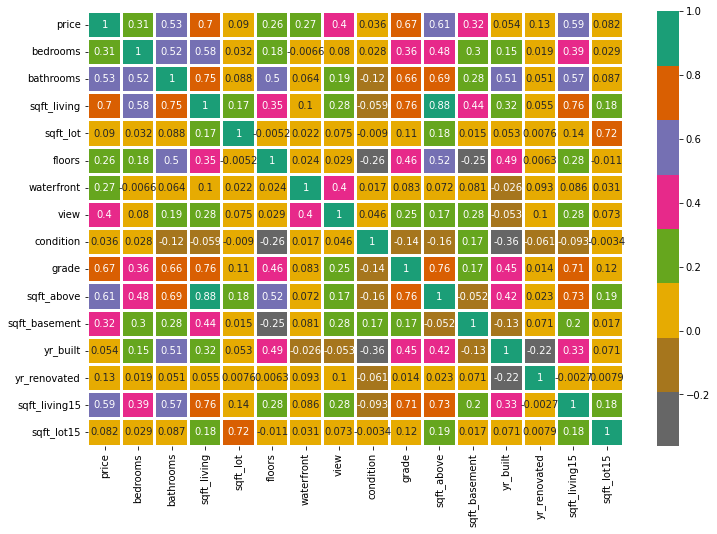

In [193]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [194]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X2 = df[features]
y2 = df[label]

In [199]:
#1.-Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("\n")
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("\n")
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000


Numero total de registros en el training set: 700
Tamaño de X_train: (700, 1)


Mumero total de registros en el test dataset: 300
Tamaño del X_test: (300, 1)


w = [-5.98980103], b = 66.89748040122576
*Coeficiente obtenidos:  [-5.98980103]
*Termino independiente::  66.89748040122576
*MSE: 48.01
*RMSE: 6.93
*R2: 0.57


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


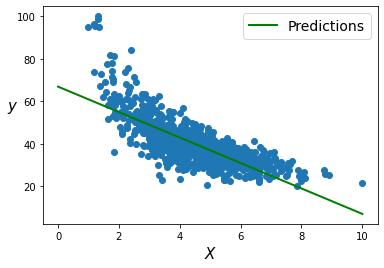

In [200]:
#2.-Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression(fit_intercept=True)
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

#Modelo generado
print('w = ' + str(regr.coef_) + ', b = ' + str(regr.intercept_))
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('*Coeficiente obtenidos: ', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('*Termino independiente:: ', regr.intercept_)
# Error Cuadrado Medio
print("*MSE: %.2f" % mean_squared_error(y_train, y_pred))
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("*RMSE: %.2f" %rmse)
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('*R2: %.2f' % r2_score(y_train, y_pred))
#Gráfica 
X_fit = np.linspace(0, 10, 100)
y_fit = regr.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-",linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=15)
plt.ylabel("$y$", rotation=0, fontsize=15)
plt.legend(loc="best", fontsize=14);




In [201]:
#3.-Realiza la  regresión polinomial completa, tu modelo generado , su visualización, sus errores y r cuadrada.
from sklearn.preprocessing import PolynomialFeatures
#Using polinomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

print("Input", poly_features.n_input_features_)
print("Output", poly_features.n_output_features_)
print("Powern", poly_features.n_input_features_)

X_poly.shape

Input 1
Output 2
Powern 1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


(700, 2)

LR:
W: 67.03904193389238
b: [-6.0333683]
*MSE: 47.22
*RMSE: 6.87
*R2: 0.58


RIDGE:
W: 66.88859752616949
b: [-5.9997329]
*MSE: 47.22
*RMSE: 6.87
*R2: 0.58


LASSO:
W: 41.963857699983286
b: [-0.42721758]
*MSE: 103.28
*RMSE: 10.16
*R2: 0.08




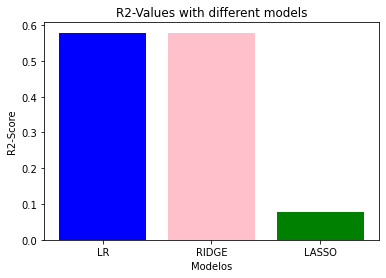

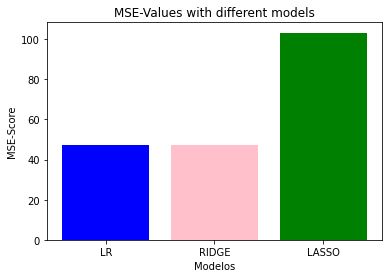

In [203]:
#4.-Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
modelos = []
modelos.append(('LR', LinearRegression()))  
modelos.append(('RIDGE', Ridge(alpha=10))) 
modelos.append(('LASSO', Lasso(alpha=10)))  


yhat0 = []   # predicciones del modelo RLM
yhat1 = []   # predicciones del RLM con regularización L1
yhat2 = []   # predicciones del RLM con regularización L2
yhat12 = []  # predicciones del RLM con regularización L1 y L2
names = []
r2s= []
mses= []


for name, model in modelos:
  # Entrenamos el modelo seleccionado y obtenemos sus predicciones:
  print("%s:" % name)
  mm = model.fit(X, np.ravel(y))
  yhat = mm.predict(X)
  
  print("W:",mm.intercept_)  
  print("b:",mm.coef_)
  mse=mean_squared_error(y, yhat)
  print("*MSE: %.2f" % mse)
  rmse = np.sqrt(mean_squared_error(y, yhat))
  print("*RMSE: %.2f" %rmse)
  r2=r2_score(y, yhat)
  print('*R2: %.2f' % r2)
  names.append(name)
  r2s.append(r2)
  mses.append(mse)
  
  


  if name=='LR':
    yhat0.append(yhat)
    print('\n')
  elif name=='LASSO':
    yhat1.append(yhat)
    print('\n')
  elif name=='RIDGE':
    yhat2.append(yhat)
    print('\n')

#5.-Finalmente gráfica :MAE (de los cuatro métodos) y R2 (de los cuatro métodos)

plt.bar(names,r2s,color=['blue','pink','green'])
plt.title("R2-Values with different models") 
plt.xlabel('Modelos')
plt.ylabel('R2-Score')
plt.show() 
   
plt.bar(names,mses,color=['blue','pink','green'])
plt.title("MSE-Values with different models") 
plt.xlabel('Modelos')
plt.ylabel('MSE-Score')
plt.show() 
   

In [ ]:
#Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?

**Conclusiones**

---

